In [3]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

In [26]:
filename = '20191231-172726'
df = pd.read_csv('../firefly-inverse-data/data/' + filename + '_history.csv',
                 usecols=['total time', 'ep', 'time step', 'reward', 'goal',
           'a_vel', 'a_ang', 'true_r', 'true_rel_ang',
           'r', 'rel_ang', 'vel', 'ang_vel',
           'vecL1','vecL2','vecL3','vecL4','vecL5','vecL6','vecL7','vecL8','vecL9','vecL10',
           'vecL11','vecL12','vecL13','vecL14','vecL15',
           'process gain forward', 'process gain angular', 'process noise std forward', 'process noise std angular',
           'obs gain forward', 'obs gain angular', 'obs noise std forward', 'obs noise std angular', 'goal radius',
           'box_size', 'discount_factor'])

In [27]:
df

,total time,ep,time step,reward,goal,a_vel,a_ang,true_r,true_rel_ang,r,...,process gain angular,process noise std forward,process noise std angular,obs gain forward,obs gain angular,obs noise std forward,obs noise std angular,goal radius,box_size,discount_factor
0,0.0,1.0,0.0,1.492437e-04,0.0,-0.051968,0.045686,0.741011,0.622734,0.741011,...,11.072887,0.186072,0.272747,9.822512,10.529225,0.704299,0.809420,0.292227,1.0,0.99
1,1.0,2.0,0.0,1.294150e-01,0.0,-0.051126,0.042759,0.518556,-0.618063,0.518556,...,8.443149,0.137472,1.652301,9.778190,11.441265,1.468548,1.734238,0.354001,1.0,0.99
2,2.0,3.0,0.0,1.437406e-01,0.0,-0.045809,0.028785,0.512067,-0.497008,0.512067,...,10.295155,0.112950,1.609698,8.982218,11.358449,0.753860,0.739419,0.353239,1.0,0.99
3,3.0,4.0,0.0,9.374529e-05,0.0,-0.054029,0.010655,0.641320,0.115616,0.641320,...,9.963476,0.570906,0.604304,9.903740,9.532301,1.786658,1.487310,0.274154,1.0,0.99
4,4.0,5.0,0.0,2.924228e-01,0.0,-0.047804,0.046436,0.455702,-0.711246,0.455702,...,11.160490,1.529756,1.146688,11.001536,11.286448,1.479468,1.396711,0.335073,1.0,0.99
5,5.0,6.0,0.0,1.835758e-02,0.0,-0.041872,0.052802,0.727343,-0.633687,0.727343,...,8.712677,1.089828,1.244489,8.636418,10.930614,1.612715,0.818566,0.445911,1.0,0.99
6,6.0,7.0,0.0,0.000000e+00,1.0,1.000000,-0.999996,0.237839,0.476570,0.237839,...,8.979505,1.880390,1.162433,9.373910,8.913426,0.149842,0.086689,0.225916,1.0,0.99
7,7.0,7.0,1.0,0.000000e+00,1.0,1.000000,-0.999618,0.162677,0.597340,0.172929,...,8.979505,1.880390,1.162433,9.373910,8.913426,0.149842,0.086689,0.225916,1.0,0.99
8,8.0,7.0,2.0,5.852704e+00,1.0,0.076492,0.015523,0.111465,0.775384,0.108228,...,8.979505,1.880390,1.162433,9.373910,8.913426,0.149842,0.086689,0.225916,1.0,0.99
9,9.0,8.0,0.0,1.195237e-01,0.0,-0.036972,0.056242,0.983683,-0.345416,0.983683,...,8.834835,1.378413,0.531499,8.299934,11.197492,1.407823,1.188157,0.465518,1.0,0.99


Text(0, 0.5, 'forward velocity control')

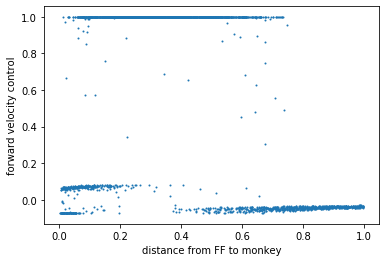

In [28]:
df.plot.scatter(x = 'r', y='a_vel',s=1)
plt.xlabel('distance from FF to monkey')
plt.ylabel('forward velocity control')

Text(0, 0.5, 'angular velocity control')

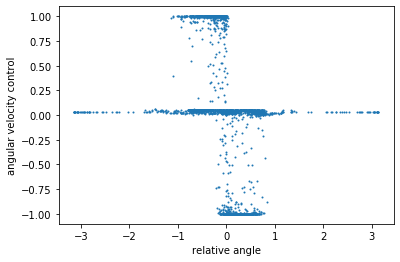

In [29]:
df.plot.scatter(x = 'rel_ang', y='a_ang',s=1)
plt.xlabel('relative angle')
plt.ylabel('angular velocity control')

Text(0, 0.5, 'angular velocity control')

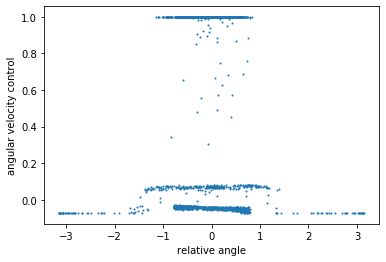

In [30]:
df.plot.scatter(x = 'rel_ang', y='a_vel',s=1)
plt.xlabel('relative angle')
plt.ylabel('angular velocity control')

Text(0, 0.5, 'angular velocity control')

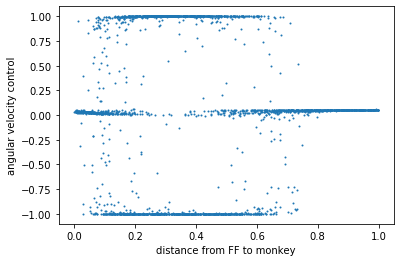

In [31]:
df.plot.scatter(x = 'r', y='a_ang',s=1)
plt.xlabel('distance from FF to monkey')
plt.ylabel('angular velocity control')

In [32]:
COLUMNS = ['ep', 'process gain forward', 'process gain angular', 'obs gain forward', 'obs gain angular', 'goal radius', 'reward']
ep_log = pd.DataFrame(columns=COLUMNS)


ep_temp = 2
for t in df['total time']:
    
    if df['ep'][t] == ep_temp:
        ep = df['ep'][t-1]
        proc_forw = df['process gain forward'][t-1]
        proc_ang = df['process gain angular'][t-1]
        obs_forw = df['obs gain forward'][t-1]
        obs_ang = df['obs gain angular'][t-1]
        goal_rad = df['goal radius'][t-1]
        rwd = df['reward'][t-1]
        ep_temp += 1
        data = np.array([[ep, proc_forw, proc_ang, obs_forw, obs_ang, goal_rad, rwd]])
        df1 = pd.DataFrame(data, columns=COLUMNS)
        ep_log = ep_log.append(df1)
        


Text(0, 0.5, 'reward')

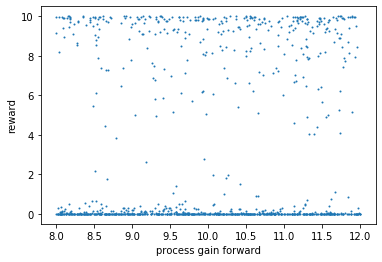

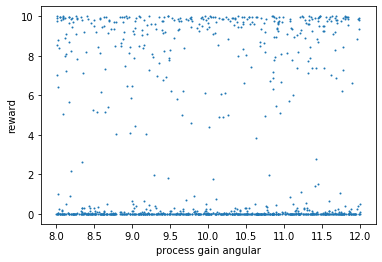

In [33]:
ep_log.plot.scatter(x = 'process gain forward', y='reward',s=1)
plt.xlabel('process gain forward')
plt.ylabel('reward')

ep_log.plot.scatter(x = 'process gain angular', y='reward',s=1)
plt.xlabel('process gain angular')
plt.ylabel('reward')

Text(0, 0.5, 'reward')

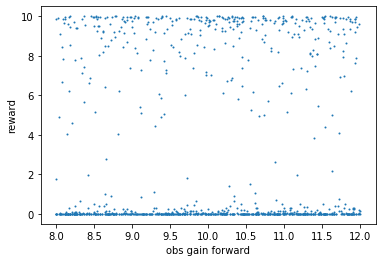

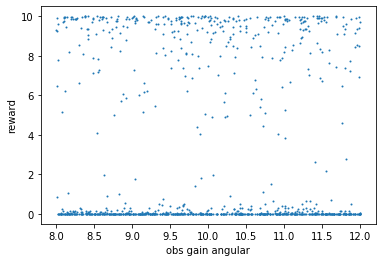

In [34]:
ep_log.plot.scatter(x = 'obs gain forward', y='reward',s=1)
plt.xlabel('obs gain forward')
plt.ylabel('reward')

ep_log.plot.scatter(x = 'obs gain angular', y='reward',s=1)
plt.xlabel('obs gain angular')
plt.ylabel('reward')

Text(0, 0.5, 'reward')

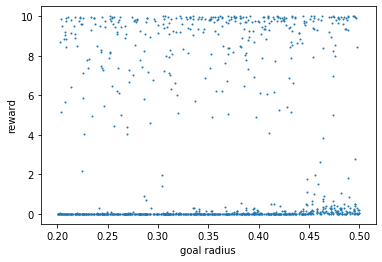

In [35]:
ep_log.plot.scatter(x = 'goal radius', y='reward',s=1)
plt.xlabel('goal radius')
plt.ylabel('reward')